In [3]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import pickle
import os

# Trained model

## Model Lou NOT

Load data

In [9]:
X_lou = pd.pandas.read_csv("../../../data/3Boxes_coords.csv",  names=None)
X_lou = pd.DataFrame(X_lou)
X_lou.drop(columns=X_lou.columns[0], axis=1, inplace=True)

X_jennie = pd.pandas.read_csv("C:/Users/P14s/UQAM/Groupe UQAM - McGill WELL-E - emotion_analyses/data/long_videos_NOT_Aimee/Jennie_boxes_cow_head_snout.csv", names=None)
X_jennie = pd.DataFrame(X_jennie)
X_jennie.drop(columns=X_jennie.columns[0], axis=1, inplace=True)
print(X_jennie)

X_thunder = pd.pandas.read_csv("C:/Users/P14s/UQAM/Groupe UQAM - McGill WELL-E - emotion_analyses/data/long_videos_NOT_Aimee/Thunder_boxes_cow_head_snout.csv")
X_thunder = pd.DataFrame(X_thunder)
X_thunder.drop(columns=X_thunder.columns[0], axis=1, inplace=True)


          cow L     cow T     cow W     cow H    head L    head T    head W  \
0      561.4244  247.2437  379.8319  508.2353  618.5672  254.0504  319.3277   
1      561.4257  247.2563  379.8173  508.2406  618.5588  254.0416  319.3215   
2      561.4265  247.2638  379.8086  508.2437  618.5539  254.0364  319.3177   
3      561.4304  247.3005  379.7661  508.2591  618.5295  254.0109  319.2995   
4      561.4374  247.3664  379.6896  508.2866  618.4857  253.9651  319.2668   
...         ...       ...       ...       ...       ...       ...       ...   
47847  522.6149  536.1451  340.5305  266.3852  642.0293  542.6577  219.3616   
47848  522.6689  536.1423  340.4922  266.3992  642.0586  542.6633  219.3481   
47849  522.7156  536.1399  340.4591  266.4113  642.0839  542.6682  219.3364   
47850  522.7880  536.1361  340.4078  266.4301  642.1231  542.6757  219.3183   
47851  522.8684  536.1320  340.3509  266.4510  642.1667  542.6840  219.2982   

         head H   snout L   snout R  snout W  snout

In [5]:
# Load the pickled model
model_file = '../../models/EM/hmm_model_3box_Lou.pkl'
model_vi_file = '../../models/VI/hmm_model_3box_Lou.pkl'
with open(model_file, 'rb') as file:
    loaded_model = pickle.load(file)

with open(model_vi_file, 'rb') as file:
    loaded_model_vi = pickle.load(file)

print(loaded_model_vi)

VariationalGaussianHMM(n_components=9, n_iter=52, random_state=19)


In [6]:
# Use the trained model for prediction
predicted_states_jennie = loaded_model.predict(X_jennie)
predicted_states_thunder = loaded_model.predict(X_thunder)
predicted_states_lou = loaded_model.predict(X_lou)

In [7]:
jennie_states = pd.unique(predicted_states_jennie)
thunder_states = pd.unique(predicted_states_thunder)
lou_states = pd.unique(predicted_states_lou)
print(jennie_states)
print(thunder_states)
print(lou_states)

[7 5 1]
[7 2 0]
[7 1 5 4 6 8 2 3 0]


In [ ]:
jennie_states = pd.unique(predicted_states_jennie)
thunder_states = pd.unique(predicted_states_thunder)
lou_states = pd.unique(predicted_states_lou)
print(jennie_states)
print(thunder_states)
print(lou_states)

[8 1 2]
[8 2]
[3 7 4 2 0 6 1 5 8]


Text(0.5, 0.98, 'Jennie preddicted')

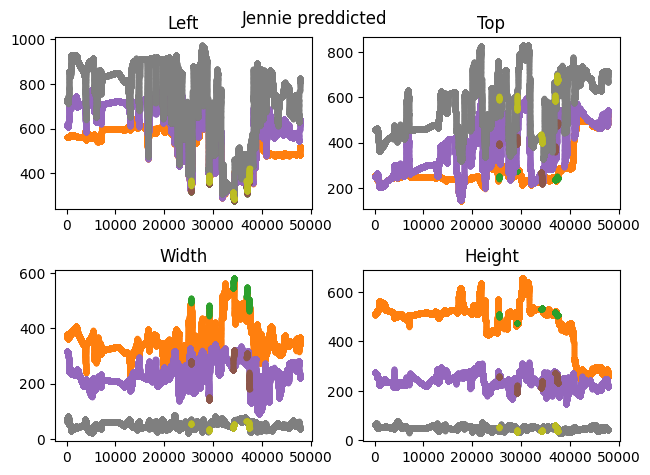

In [23]:
#print(X_jennie['cow L'])

# COW
plt.subplot(2,2,1)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['cow L'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in jennie_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['cow T'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['cow W'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['cow H'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Height")

# HEAD
plt.subplot(2,2,1)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['head L'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in jennie_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['head T'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['head W'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['head H'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Height")

# SNOUT
plt.subplot(2,2,1)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['snout L'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in jennie_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['snout R'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['snout W'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in jennie_states:
    x = np.linspace(1,len(X_jennie),len(X_jennie))[(predicted_states_jennie == i)]
    y = X_jennie['snout H'][(predicted_states_jennie == i)]
    plt.plot(x, y, '.')
    plt.title("Height")
plt.tight_layout()

plt.suptitle('Jennie preddicted')
# rajouter les etiquettes 